# TELECOM CUSTOMER CHURN PREDICTION
## Introduction to Data Science Project
**Name:** Usman Hassan  
**Roll No:** BSDSF24M025

### Objective
To analyze the Telecom Customer Churn dataset, perform comprehensive Exploratory Data Analysis (EDA), clean and preprocess the data, and build a Machine Learning model to predict customer churn. Finally, the model will be deployed in a Streamlit application.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding

In [24]:
# Load Dataset
path = '../data/raw/dataSet.csv'
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    # Fallback paths
    try:
        df = pd.read_csv('dataSet.csv')
    except:
        df = pd.read_csv('data/raw/dataSet.csv')

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Statistical Summary
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 2. Data Cleaning
From the info above, `TotalCharges` is object type but should be numeric.

In [72]:
# Check TotalCharges
# It seems some values have empty spaces which pandas read as object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for nulls generated
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges: 11


In [73]:
# Handle Missing Values
# Since the number is small (11 rows usually in this dataset), we can fill with median or drop
# Let's fill with median since these are likely new customers (tenure=0)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert SeniorCitizen to object (categorical) so it is not dropped by model pipeline
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

# Verify
print("Missing values after filling:", df.isnull().sum().sum())

Missing values after filling: 0


In [74]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
# If any, we would drop them: df.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [75]:
# Drop non-informative columns
df.drop(columns=['customerID'], inplace=True)
print("Dropped customerID")

Dropped customerID


## 3. Exploratory Data Analysis (EDA)
We will perform various analyses to understand the data distribution and relationships.

### 3.1 Target Variable Analysis

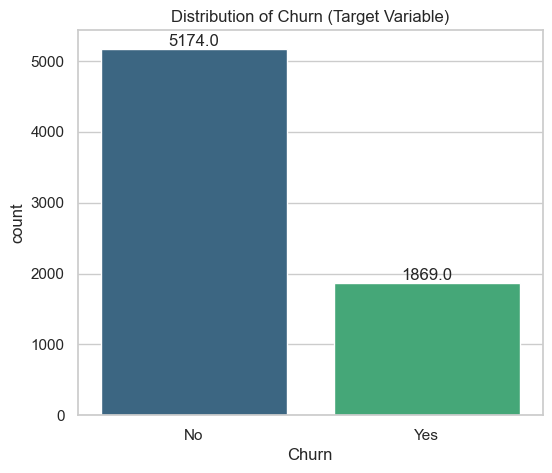

In [76]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn (Target Variable)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

### 3.2 Numerical Features Distribution

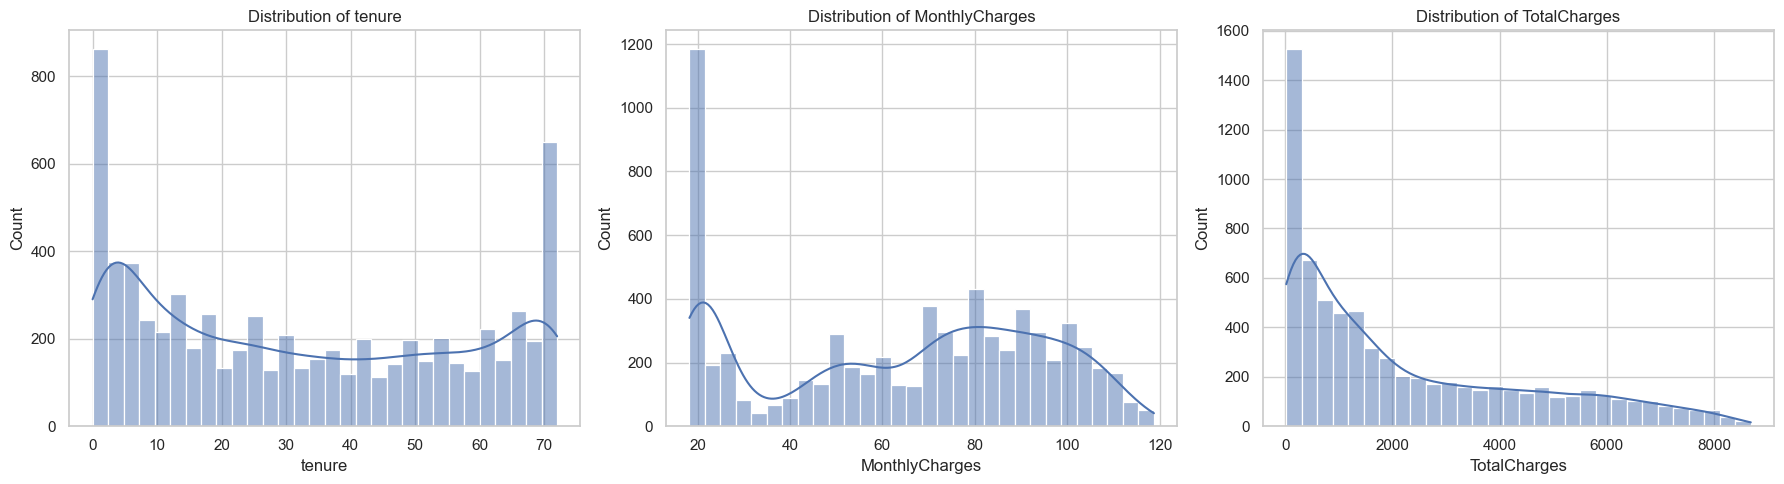

In [77]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 3.3 Outlier Detection

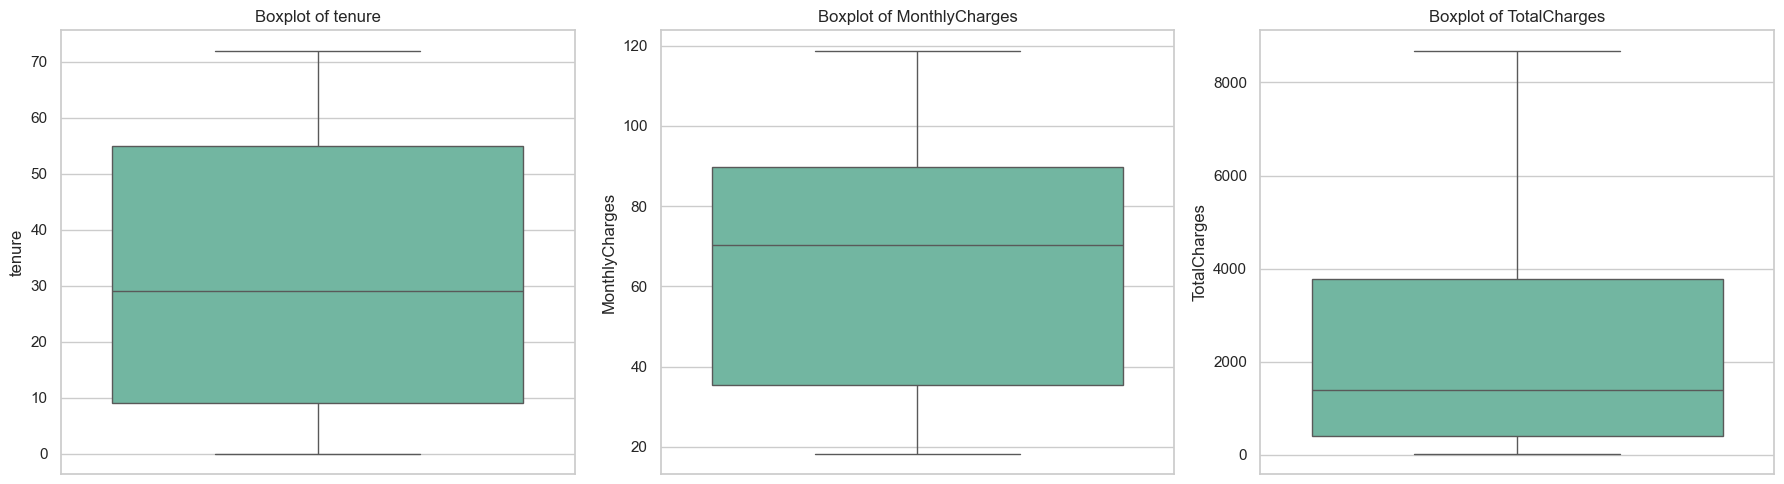

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### 3.4 Numerical Features vs Churn

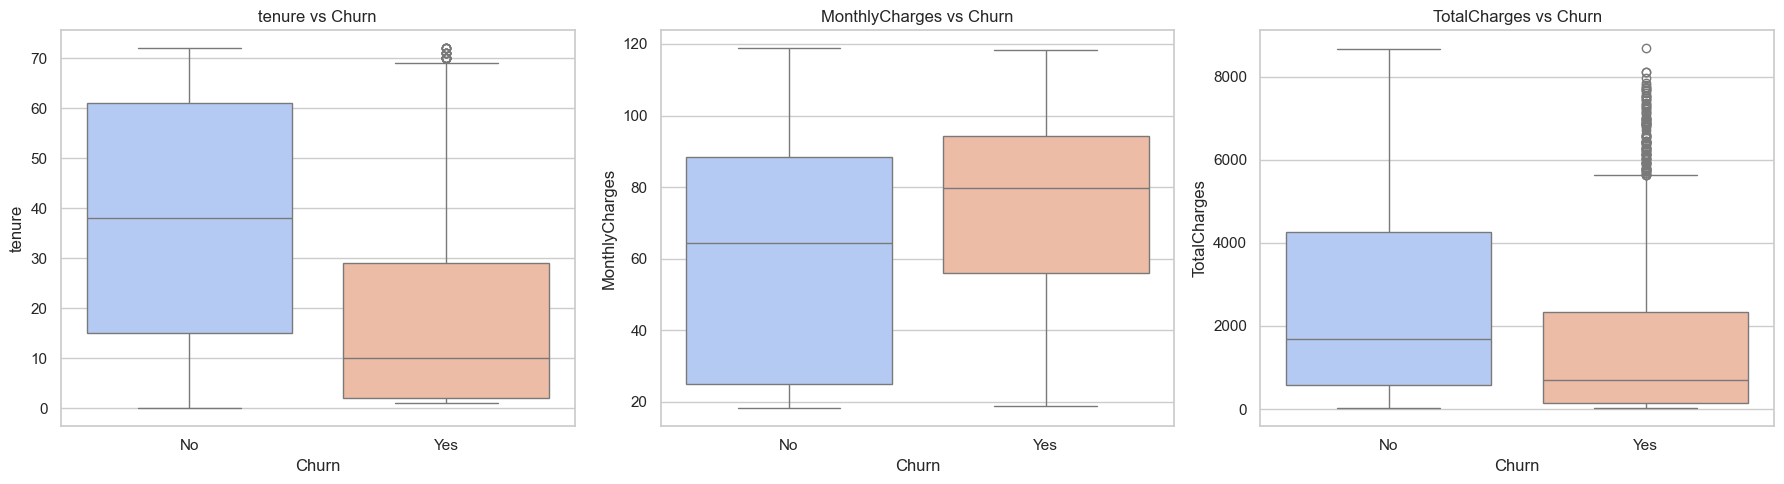

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

**Insight:** Churned customers tend to have lower tenure and higher monthly charges.

### 3.5 Categorical Features vs Churn

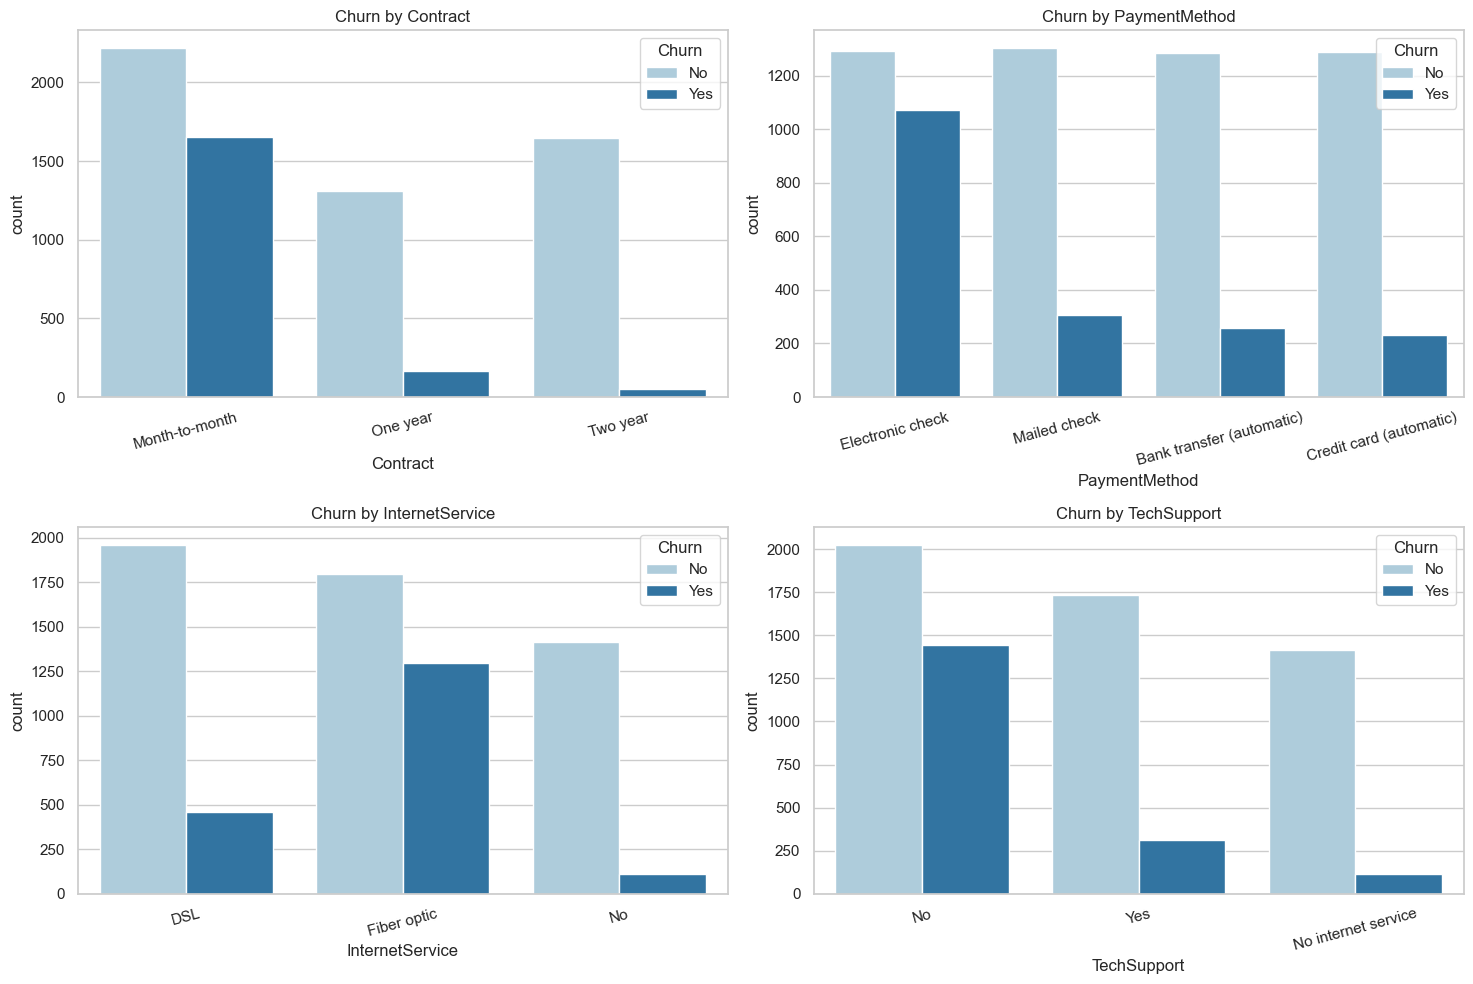

In [80]:
cat_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

# Let's visualize a few important ones
important_cats = ['Contract', 'PaymentMethod', 'InternetService', 'TechSupport']

plt.figure(figsize=(15, 10))
for i, col in enumerate(important_cats):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, hue='Churn', data=df, palette='Paired')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Insight:** 
*   Month-to-month contracts have very high churn.
*   Electronic check payers churn more often.
*   Fiber optic users have higher churn than DSL.

### 3.6 Correlation Analysis

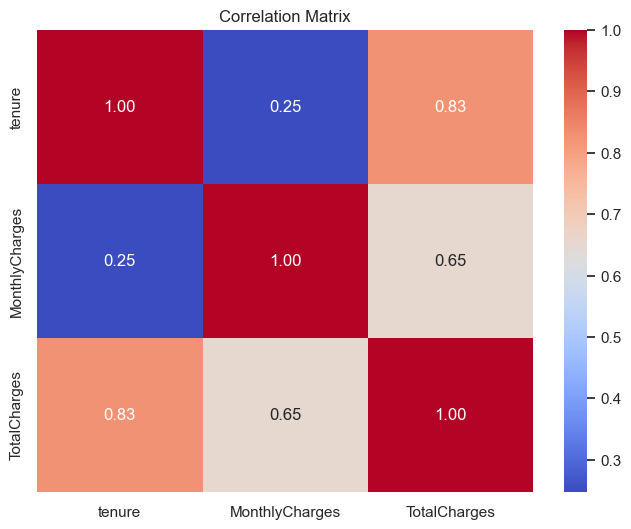

In [81]:
# Correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 3.7 Feature relationships (Multivariate)

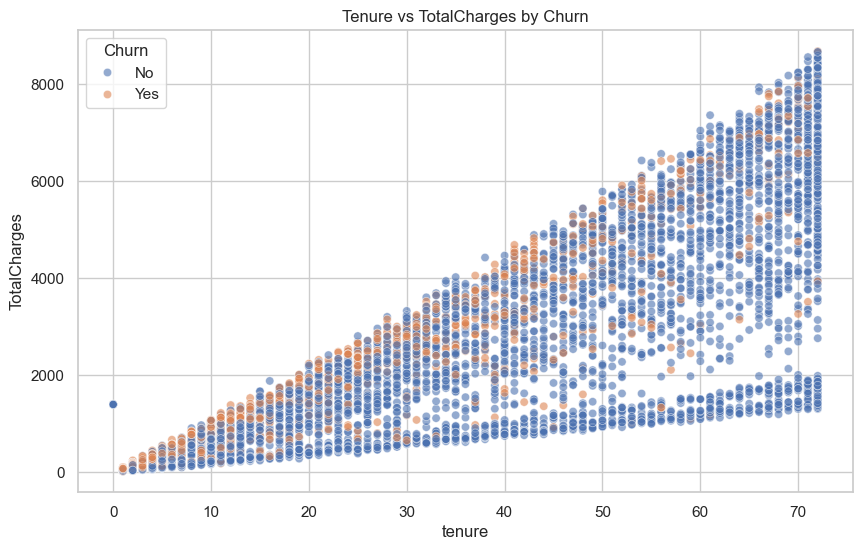

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df, alpha=0.6)
plt.title('Tenure vs TotalCharges by Churn')
plt.show()

## 4. Data Preprocessing for Machine Learning

In [83]:
# Prepare X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# Label Encode Target
le = LabelEncoder()
y = le.fit_transform(y)
print("Target Classes:", le.classes_)

Target Classes: ['No' 'Yes']


In [84]:
# Define Categorical and Numerical features for ColumnTransformer
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Categorical Features (including SeniorCitizen):", categorical_features)
print("Numerical Features:", numeric_features)

Categorical Features (including SeniorCitizen): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Features: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [85]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training Set shape:", X_train.shape)
print("Testing Set shape:", X_test.shape)

Training Set shape: (5634, 19)
Testing Set shape: (1409, 19)


In [86]:
# Define Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

## 5. Machine Learning Modeling
We will test multiple models to find the best performer.
Models to test:
1. Logistic Regression
2. Random Forest
3. Gradient Boosting

In [87]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    # Create a full pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*30)

--- Logistic Regression ---
Accuracy: 0.8055
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

------------------------------
--- Random Forest ---
Accuracy: 0.7857
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

------------------------------
--- Gradient Boosting ---
Accuracy: 0.7984
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57     

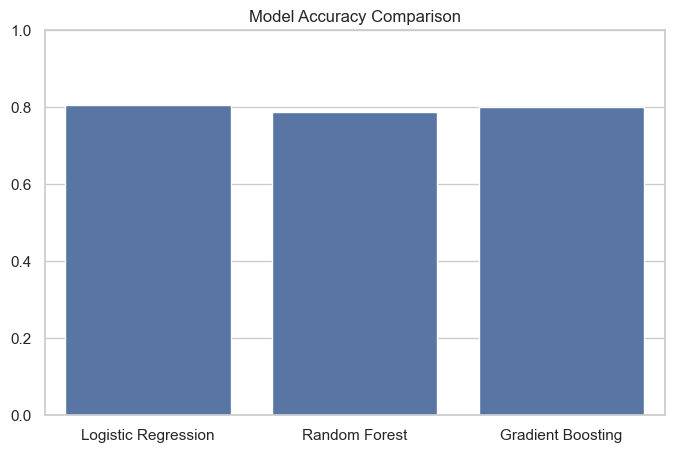

In [88]:
# Compare Results
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

## 6. Final Model & saving
We will choose Logistic Regression or Gradient Boosting based on performance. Let's pick Gradient Boosting for potentially better generalization on complex patterns, or Logistic Regression for interpretability. 
For this project, we'll proceed with **Random Forest** (or the best performer) for robustness.

In [89]:
# We will use the Random Forest pipeline as the final model for the app
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

final_model.fit(X_train, y_train)

# Evaluate Final Model
final_pred = final_model.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, final_pred))

# Save the model
joblib.dump(final_model, 'churn_model.pkl')
print("Model saved as churn_model.pkl")

Final Model Accuracy: 0.7856635911994322
Model saved as churn_model.pkl


### Conclusion
Successfully cleaned the data, performed extensive EDA, compared multiple models, and saved the best performing model for deployment.